# 사전 임포트

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'            # 자기 경로를 쓰기

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'

Mounted at /gdrive
중간저장	   list.txt	  reviews_2.csv  reviews.csv	 star_time.csv
google_review.csv  reviews_1.csv  reviews_3.csv  star_final.csv


In [ ]:
!pip install nltk
!pip install konlpy==0.5.2
!pip install tweepy==3.10.0

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

In [4]:
import pandas as pd
import numpy as np
import collections

In [150]:
from tqdm import tqdm_notebook 
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Okt

import nltk
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 데이터 불러오기 및 정리

### 데이터 불러오기

In [7]:
df = pd.read_csv(drive_path + 'star_final.csv', encoding='utf-8').rename(columns={'0': '단어'}).set_index('단어')

In [8]:
df = df.drop(columns=['1_per', '2_per', '3_per', '4_per', '5_per'])

In [309]:
df

,1,2,3,4,5,sum,avg
단어,,,,,,,
사람,56,74,239,340,320,1029,3.771623
음식,54,55,145,147,169,570,3.564912
한복,46,69,206,323,411,1055,3.932701
그냥,40,46,91,36,31,244,2.885246
별로,37,35,97,37,25,231,2.904762
...,...,...,...,...,...,...,...
아이,1,3,15,39,62,120,4.316667
걱정,1,2,3,1,3,10,3.300000
겨울,1,1,4,15,10,31,4.032258


In [236]:
df.describe()

,1,2,3,4,5,sum,avg
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,4.686981,5.623269,15.639889,21.792244,24.889197,72.631579,3.583371
std,7.089826,9.398694,27.112276,40.773746,48.348836,126.382598,0.461502
min,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.074074
25%,1.000000,1.000000,3.000000,4.000000,4.000000,17.000000,3.292683
50%,2.000000,3.000000,7.000000,9.000000,9.000000,31.000000,3.647059
75%,5.000000,6.000000,15.000000,23.000000,24.000000,73.000000,3.944000
max,56.000000,74.000000,239.000000,340.000000,411.000000,1055.000000,4.488263


### 별점, 언급 수 높은 순 정리

In [10]:
# 평균 별점 갯수 순으로 정리
df_sort = df.sort_values(by=['avg'], axis=0, ascending=False)

In [11]:
display(df_sort.iloc[:20])
print()
display(df_sort.iloc[-20:])

,1,2,3,4,5,sum,avg
단어,,,,,,,
가족,1,1,12,78,121,213,4.488263
아주,3,1,9,31,76,120,4.466667
친구,1,3,9,36,73,122,4.450820
모두,1,4,3,19,43,70,4.414286
한국,5,11,26,46,145,233,4.351931
추억,1,4,17,67,85,174,4.327586
아이,1,3,15,39,62,120,4.316667
국밥,1,1,4,8,18,32,4.281250
여행,5,10,19,54,106,194,4.268041


,1,2,3,4,5,sum,avg
단어,,,,,,,
업적,2,1,3,1,1,8,2.750000
일이,2,2,1,2,1,8,2.750000
바가지,7,5,12,4,3,31,2.709677
달리,3,2,1,3,1,10,2.700000
어디가,3,1,3,2,1,10,2.700000
장터,1,4,3,1,1,10,2.700000
쓰레기,6,2,5,6,1,20,2.700000
실망,13,15,28,13,3,72,2.694444
판매점,5,1,1,3,2,12,2.666667


In [12]:
# 언급 수 높은 순으로 정리
df_sum = df.sort_values(by=['sum'], axis=0, ascending=False)

In [13]:
display(df_sum.iloc[:20])
print()
display(df_sum.iloc[-20:])

,1,2,3,4,5,sum,avg
단어,,,,,,,
한복,46,69,206,323,411,1055,3.932701
사람,56,74,239,340,320,1029,3.771623
먹거리,35,42,178,300,352,907,3.983462
거리,24,47,139,267,285,762,3.973753
볼거리,22,26,83,202,300,633,4.156398
음식,54,55,145,147,169,570,3.564912
전통,23,40,103,131,187,484,3.865702
사진,23,20,80,144,199,466,4.021459
체험,9,10,71,140,207,437,4.203661


,1,2,3,4,5,sum,avg
단어,,,,,,,
현금,2,1,2,2,2,9,3.111111
명성,2,1,4,1,1,9,2.777778
대중교통,2,1,2,3,1,9,3.000000
주로,1,1,1,4,2,9,3.555556
표현,1,1,2,3,2,9,3.444444
이기,1,1,1,3,3,9,3.666667
여행객,1,2,2,1,3,9,3.333333
관련,1,1,4,1,2,9,3.222222
무상,2,1,3,1,1,8,2.750000


### 카테고리별 분류

In [15]:
# 카테고리 분류
# 전주, 마을 : 불용어 처리로 따로 봐야할 듯.
a_a = ['마을', '전주', '전주시']

# 어찌 분류 모름
idontknow = ['사진', '전통', '시간', '방문', '대여', '하나', 
             '추천', '다시', '정도', '가격', '진짜', '전혀', '이제',
             '예전', '차라리', '여기', '매우', '가지', '완전', '문화',
             '대한', '모습', '가기', '가득', '이름', '특색', '어디', '복대',
             '쓰레기', '국적', '한번', '여행', '전부', '기전', '한국',
             '무슨', '주말' '물가', '또한', '보고', '서울', '가장', '잠시',
             '컨셉', '가야', '역사', '상업성', '고유', '오지', '지금', 
             '옛날', '사장', '퇴색', '기억', '도시', '대부분', '의미', '관광',
             '제대로', '날씨', '테마', '요즘', '전라도', '코로나',
             '때문', '필요', '정신', '확인', '인상', '처음', '평일', '어디가',
             '이상', '점점', '이용', '관리', '전기', '찾기', '개량', '아주',
             '달리', '전체', '중간', '가시', '여름', '다른', '자체', '사실',
             '천지', '오목', '근처', '고장', '고풍', '찍기', '옥상', '서서',
             '가요', '운영', '제일', '개발', '인근', '수준', '전통문화',
             '보이', '대박', '업적', '비교', '외국', '가치', '문제', '임대',
             '명성', '단지', '특유', '인심', '세계', '잔뜩', '무엇', '물건',
             '몇번', '추억', '바로', '냄새', '부분', '안동', '월요일', '복장',
             '기도', '투어', '이번', '홍대', '개성', '모두', '표현', '계속',
             '각종', '만해', '뭔가', '만하', '본질', '규모', '곳곳', '변화',
             '이전', '이색', '걷기', '주로', '다음', '모든', '사용', '그것',
             '편이', '보기', '지도', '멀리', '방송', '퓨전', '모양', '사주',
             '역시', '이해', '시기', '배려', '잠깐', '집들이', '정돈', '발생',
             '그거', '직접', '일찍', '구석구석', '경기', '거의', '누구',
             '나름', '개화', '갈수록', '조성', '형성', '부족', '관련', '그다지',
             '겨울']
# 정량적 평가
volume = []

# 얘는 뭘까 + 중요할수도 잇는 것들(반전)
why = ['천국', '무상', '오히려', '다만', '불편', '인위']

# 빼야할거 같어
minus = ['번은', '곳도', '인지', '이면', '가면', '사고', '일이', '가세',
         '안보', '이나', '등등', '이기', '위해', '하니', '읍니']

# 즐길거리 - 체험
enjoy = ['체험', '컨텐츠', '서비스', '공연', '축제', '풍년제',
         '전시관', '그림', '전시', '한복', '태조',
         '민속촌', '전동성당', '전동', '성당']

# 느낌적인 느낌
feel = ['그냥', '별로', '생각', '정말', '느낌', '실망', '후회', '분위기',
        '별루', '정취', '아쉬움', '그닥', '재미', '기대', '굳이', '기분',
        '부담', '걱정']

# 사람 관련 + 밀집
human = ['사람', '관광객', '우리', '손님', '외국인', '개인', '번잡', '친구',
         '젊은이', '여행객', '주인', '본인', '북적', '커플', '가족', '청년',
         '아이']

# 먹거리 종류, 장소, 음식
dishes = ['먹거리', '식당', '비빔밥', '꼬치', '초코파이', '군것질', '구이',
          '간식', '탕후루', '아이스크림', '맛집', '커피', '육회', '떡갈비',
          '식사', '만두', '닭꼬치', '콩나물', '국밥', '치즈', '문어', '까페',
          '주전부리', '카페']

# 교통 : 주차, 버스 등
transport=['주차', '주차장', '스쿠터', '오토바이', '바이크', '택시',
           '대중교통', '전동차', '차량', '차비', '교통', '셔틀버스', '공영']

# 즐길 컨텐츠? - 돈
goods = ['한복', '가게', '장사', '상가', '상술', '시장', '상점',
         '상업', '상인', '바가지', '야시장', '판매점', 
         '간판', '옥집', '상권', '한복집',
         '기념품', '관람', '현금', '쇼핑',
         '만원', '남부', '상품', '의상',
         '입장료', '무료', '매장', '영업', '장터', '노점']

# 숙박
sleep = ['게스트하우스', '숙박', '숙소', '숙박시설', '숙박업소']

# 건물이 있어야 하려나

# 관광 환경(시각적, 공간적)
env = ['거리', '볼거리', '길거리', '구경', '관광지', '골목', '공간',
       '장소', '건물', '북촌', '지붕', '동네', '지역', '주변', '풍경',
       '기와', '시설', '도로', 
       '경치', '소리', '파크', '입구', '공사', '운치', '내부', '가옥', '산책', '학교',
       '코스', '데이트', '기와집', '화장실']

In [404]:
# bar graph 만들기
def bar_graph(df, kind, drop_index_name_list=0, title=''):
    # drop 사용 유무 : 너무 튀는 값 제외
    if drop_index_name_list == 0:
        df_kind = df.loc[kind].sort_values(by=['sum'], axis=0, ascending=False)
    else:
        df_kind = df.loc[kind].sort_values(by=['sum'], axis=0, ascending=False).drop(labels=drop_index_name_list)

    colors = plt.get_cmap('jet_r')(np.linspace(0.8, 0.4, len(df_kind['avg'])))
    df_kind['sum'].plot(kind='bar', 
                        figsize=(20, 8),
                        title=f'{title}',
                        color=colors)
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('')
    plt.xticks(rotation=0)
    plt.ylabel('')
    # plt.xlim(0, max(df_kind['sum']) // 25 * 25 + 25)
    plt.show()

In [157]:
def min_max(x):
    return (x - 2.5) / (4.5 - 2.5)

In [357]:
# 산점도 그래프 만들기
def scatter_graph(df, kind, drop_index_name_list=0, title=''):
    # drop 사용 유무 : 너무 튀는 값 제외
    if drop_index_name_list == 0:
        df_kind = df.loc[kind].sort_values(by=['avg'], axis=0)
    else:
        df_kind = df.loc[kind].sort_values(by=['avg'], axis=0).drop(labels=drop_index_name_list)

    # 도화지
    f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [10.5, 0.5]}, figsize=(11, 10))

    # scatter
    colors = plt.get_cmap('jet_r')(np.array(min_max(df_kind['avg'])))
    axes[0].scatter(df_kind['sum'], 
                    df_kind['avg'], 
                    c=colors, 
                    s=100)    

    # 점에 글자 표시
    x_location = max(df_kind['sum']) / 100
    y_location = 0.01
    for i in range(len(df_kind)):                                     
        axes[0].text(df_kind['sum'][i] + x_location, df_kind['avg'][i] - y_location, df_kind.index[i], fontsize=10) 

    # # 전체 단어 평균 평점 선 그리기
    xlim = max(df_kind['sum']) // 25 * 25 + 25    
    # avg_all = np.sum(df['avg'].values * df['sum'].values / df['sum'].values.sum())
    # axes[0].plot([xlim/4, xlim/4*3], 
    #             avg_all*np.ones((2,)), 
    #              '+-', 
    #              lw=2)               
    # axes[0].text(xlim/4*3 * 1.1, avg_all - 0.03, f' 전체 단어 평균 : {avg_all:.2f}', fontsize=10)

    # # 카테고리 평균 평점 선 그리기 
    # xlim = max(df_kind['sum']) // 25 * 25 + 25   
    # avg_categori = np.sum(df_kind['avg'].values * df_kind['sum'].values / df_kind['sum'].values.sum())
    # axes[0].plot([xlim/4, xlim/4*3], 
    #              avg_categori * np.ones((2,)), 
    #              'r+--', 
    #              lw=1)               
    # axes[0].text(xlim/4*3 * 1.1, avg_categori, f' {title} 평균 : {avg_categori:.2f}', fontsize=10)                        
    

    axes[0].grid(True)
    axes[0].set_title(f'{title}')
    axes[0].set_xlim(0, xlim)
    axes[0].set_xlabel('단어 수')
    axes[0].set_ylim(2.5, 4.5)
    axes[0].set_ylabel('평균 평점')

    # 컬러맵 새로 생성
    norm = matplotlib.colors.Normalize(vmin=2.5, vmax=4.5)
    f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.get_cmap('jet_r')),
               cax=axes[1], label='평균 평점')


# https://matplotlib.org/stable/tutorials/colors/colorbar_only.html

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


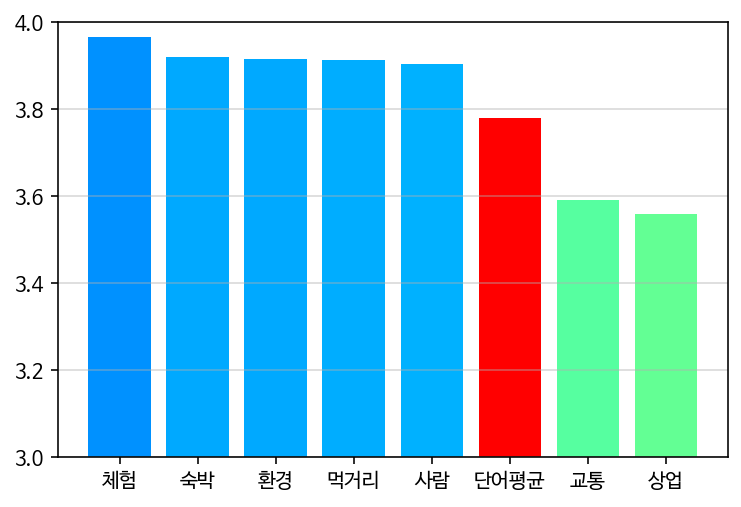

In [350]:
# 카테고리 별 평균 평점 비교
# f, axes = plt.subplot(1, 1, figsize=(16, 8))
x = ['먹거리', '상업', '숙박', '체험', '교통', '사람', '환경', '단어평균']
x_sort = ['체험', '숙박', '환경', '먹거리', '사람', '단어평균', '교통', '상업']
y = []
colors = []
for kind in [enjoy, sleep, env, dishes, human, 'avg', transport, goods]:
    if kind == 'avg':
        avg_all = np.sum(df['avg'].values * df['sum'].values / df['sum'].values.sum())
        y.append(avg_all)
        colors.append('r')
    else:
        df_kind = df.loc[kind].sort_values(by=['avg'], axis=0)
        avg_categori = np.sum(df_kind['avg'].values * df_kind['sum'].values / df_kind['sum'].values.sum())
        y.append(avg_categori)
        colors.append(plt.get_cmap('jet_r')(np.array(min_max(avg_categori))))

# avg_all = np.sum(df['avg'].values * df['sum'].values / df['sum'].values.sum())
# y.append(avg_all)
# colors.append('r')

plt.bar(x_sort, y,
        color=colors)
plt.ylim(3, 4)
plt.grid(axis='y', alpha=0.5)
plt.show()

##### 먹거리 종류

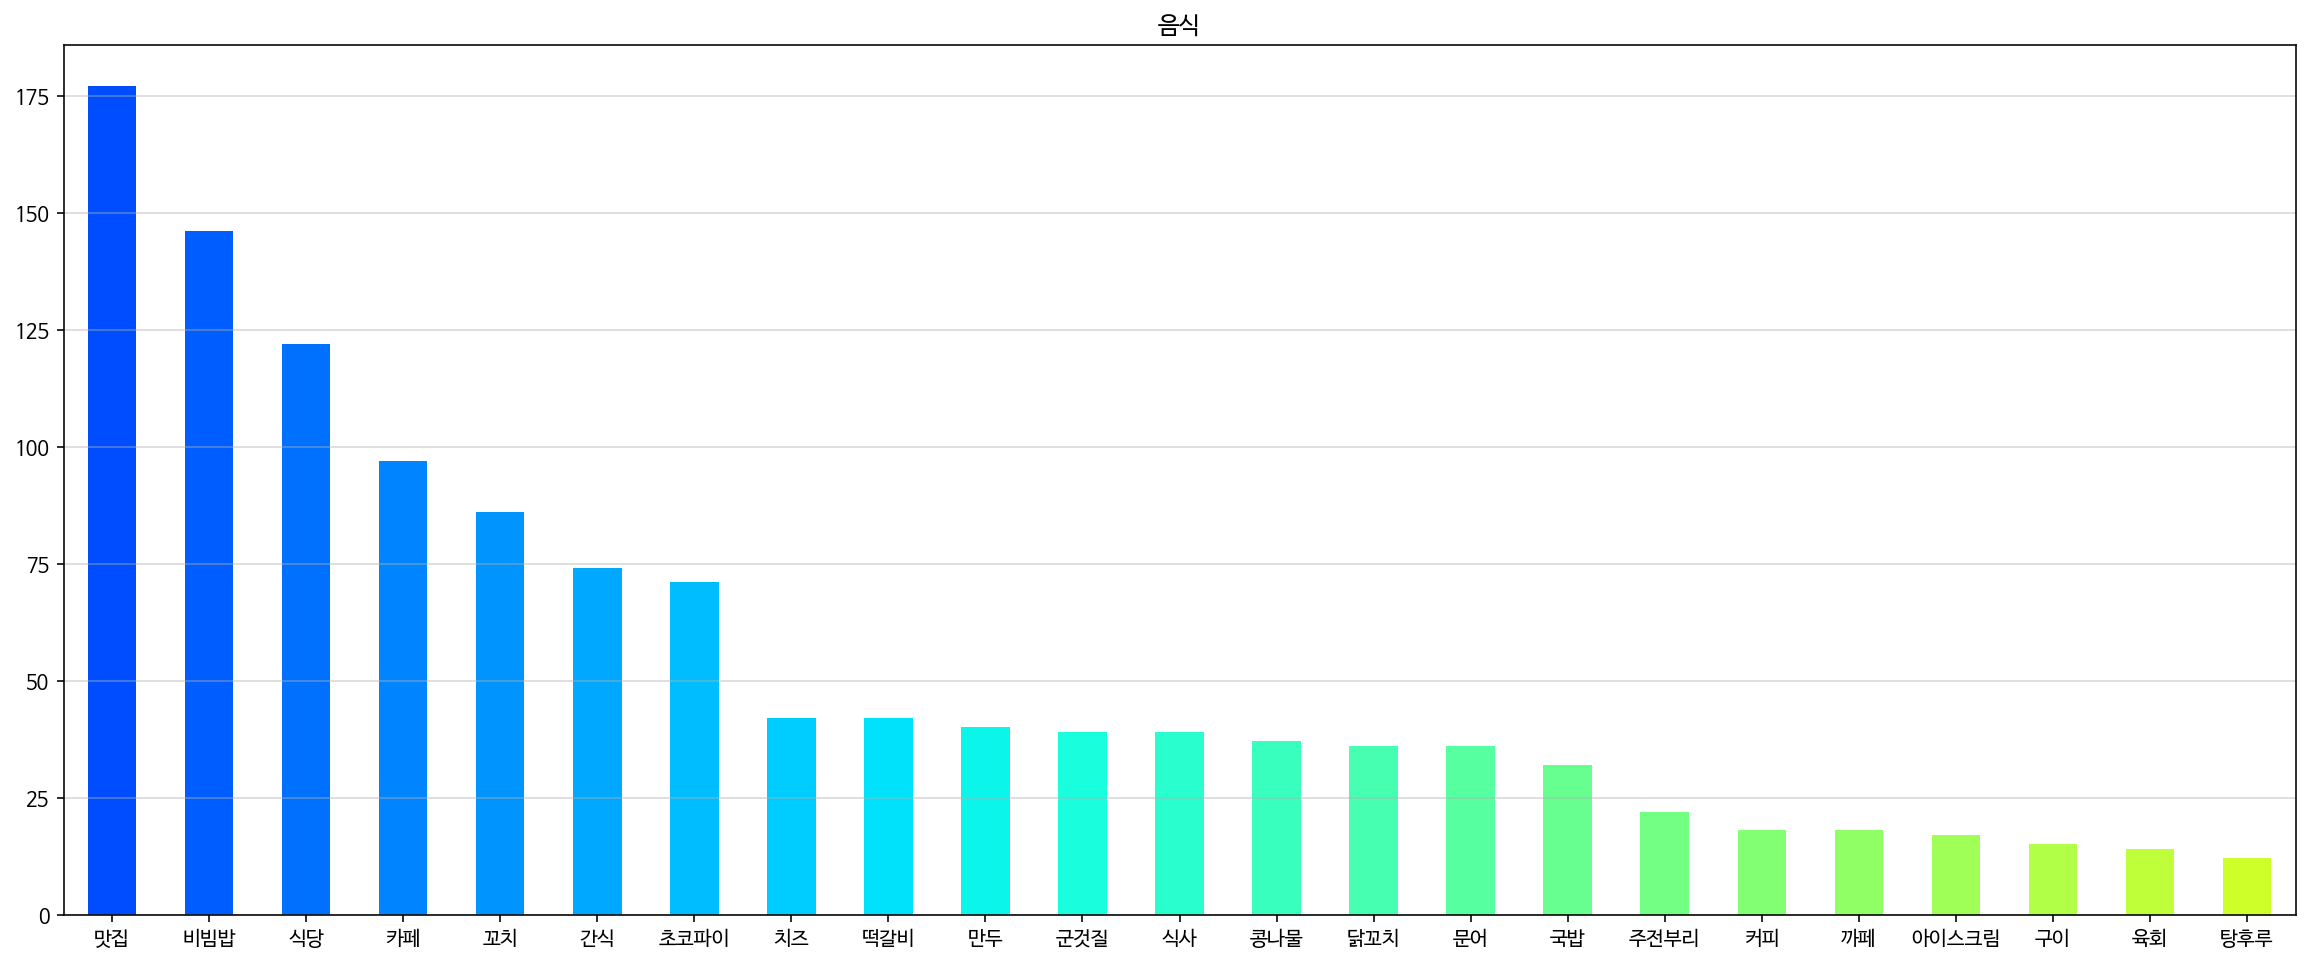

In [405]:
bar_graph(df, dishes, ['먹거리'], '음식')

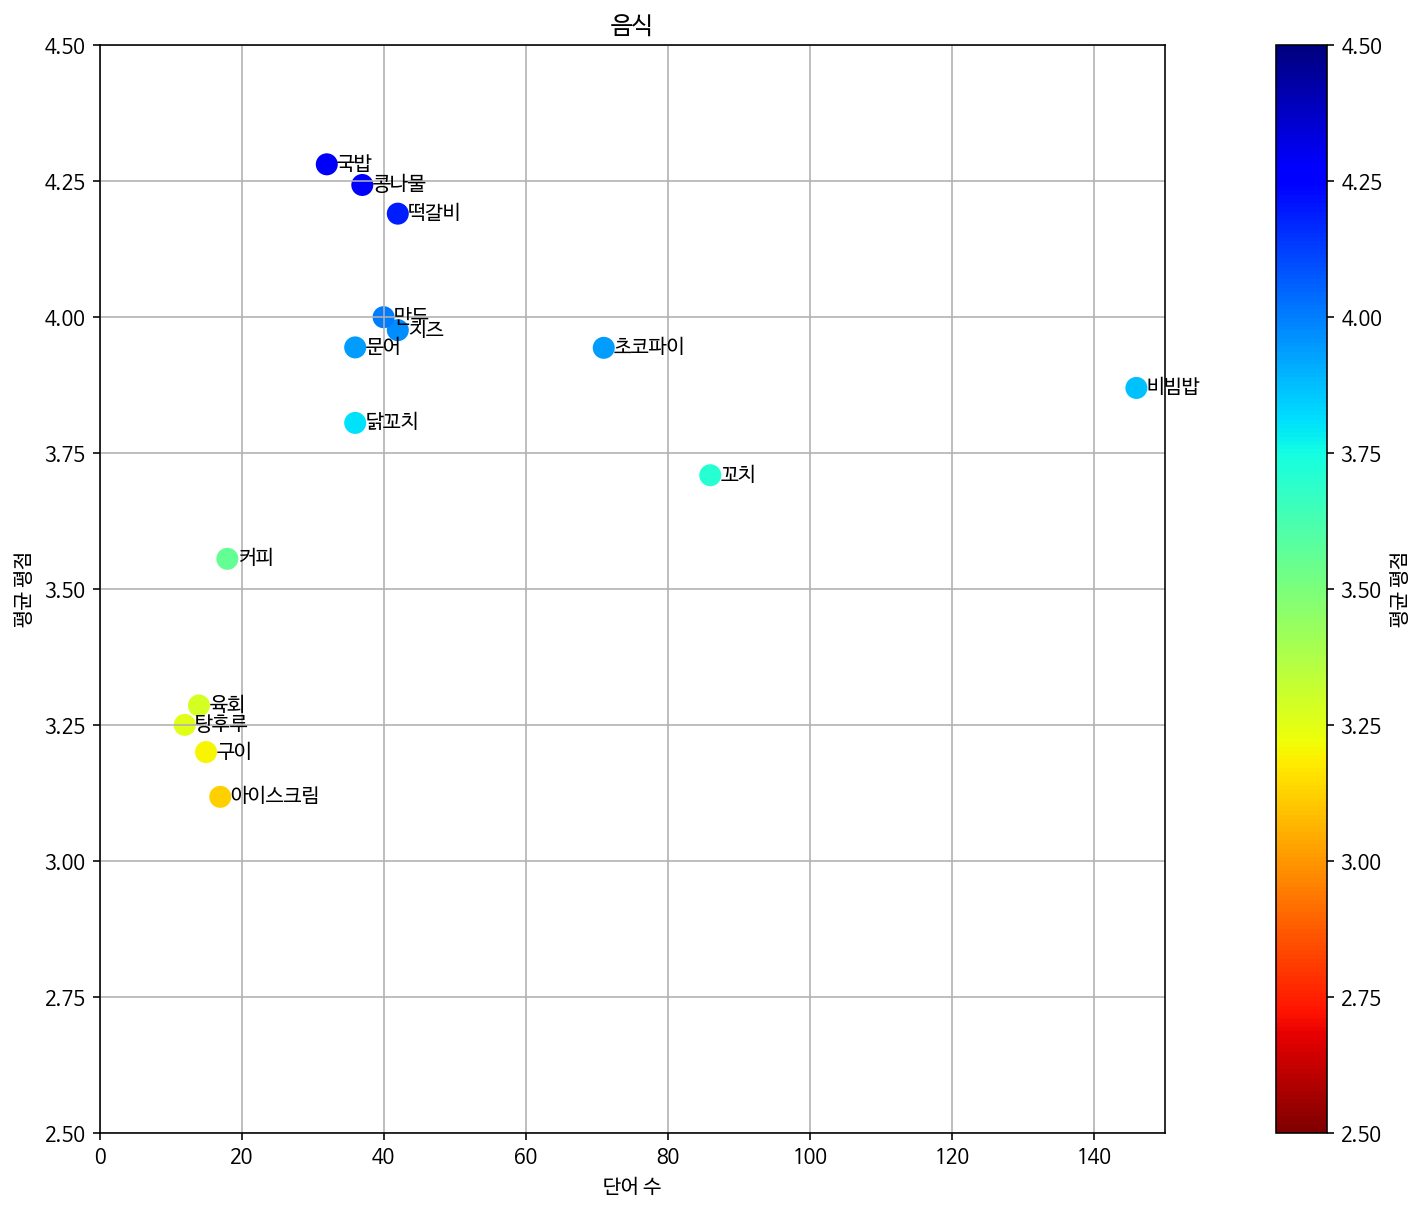

In [358]:
scatter_graph(df, dishes, ['먹거리', '맛집', '식당', '까페', '카페', '식사', '주전부리', '군것질', '간식'], '음식')
# 다른 카테고리와 달리, 둘로 명확하게 나뉜다.

##### 상업 관련

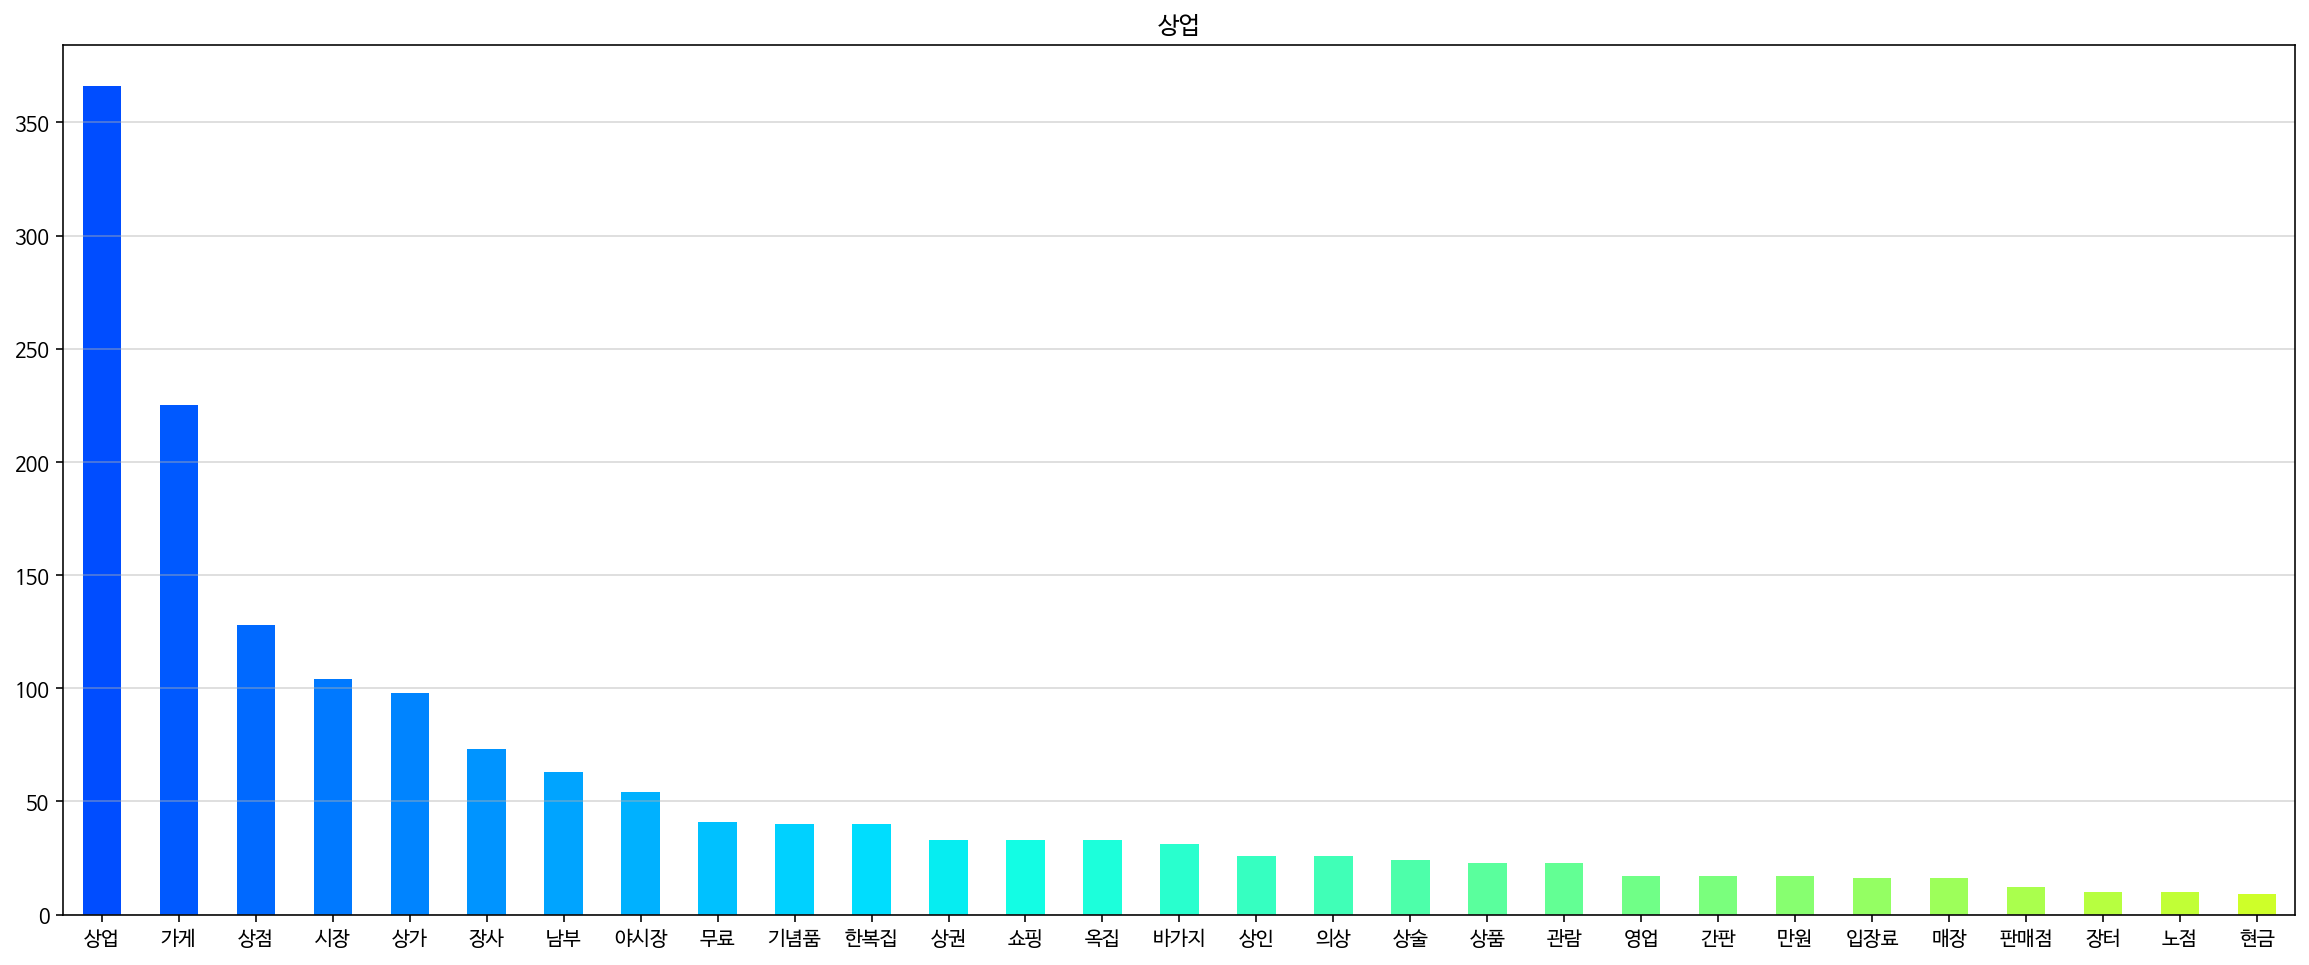

In [406]:
bar_graph(df, goods, ['한복'], '상업')

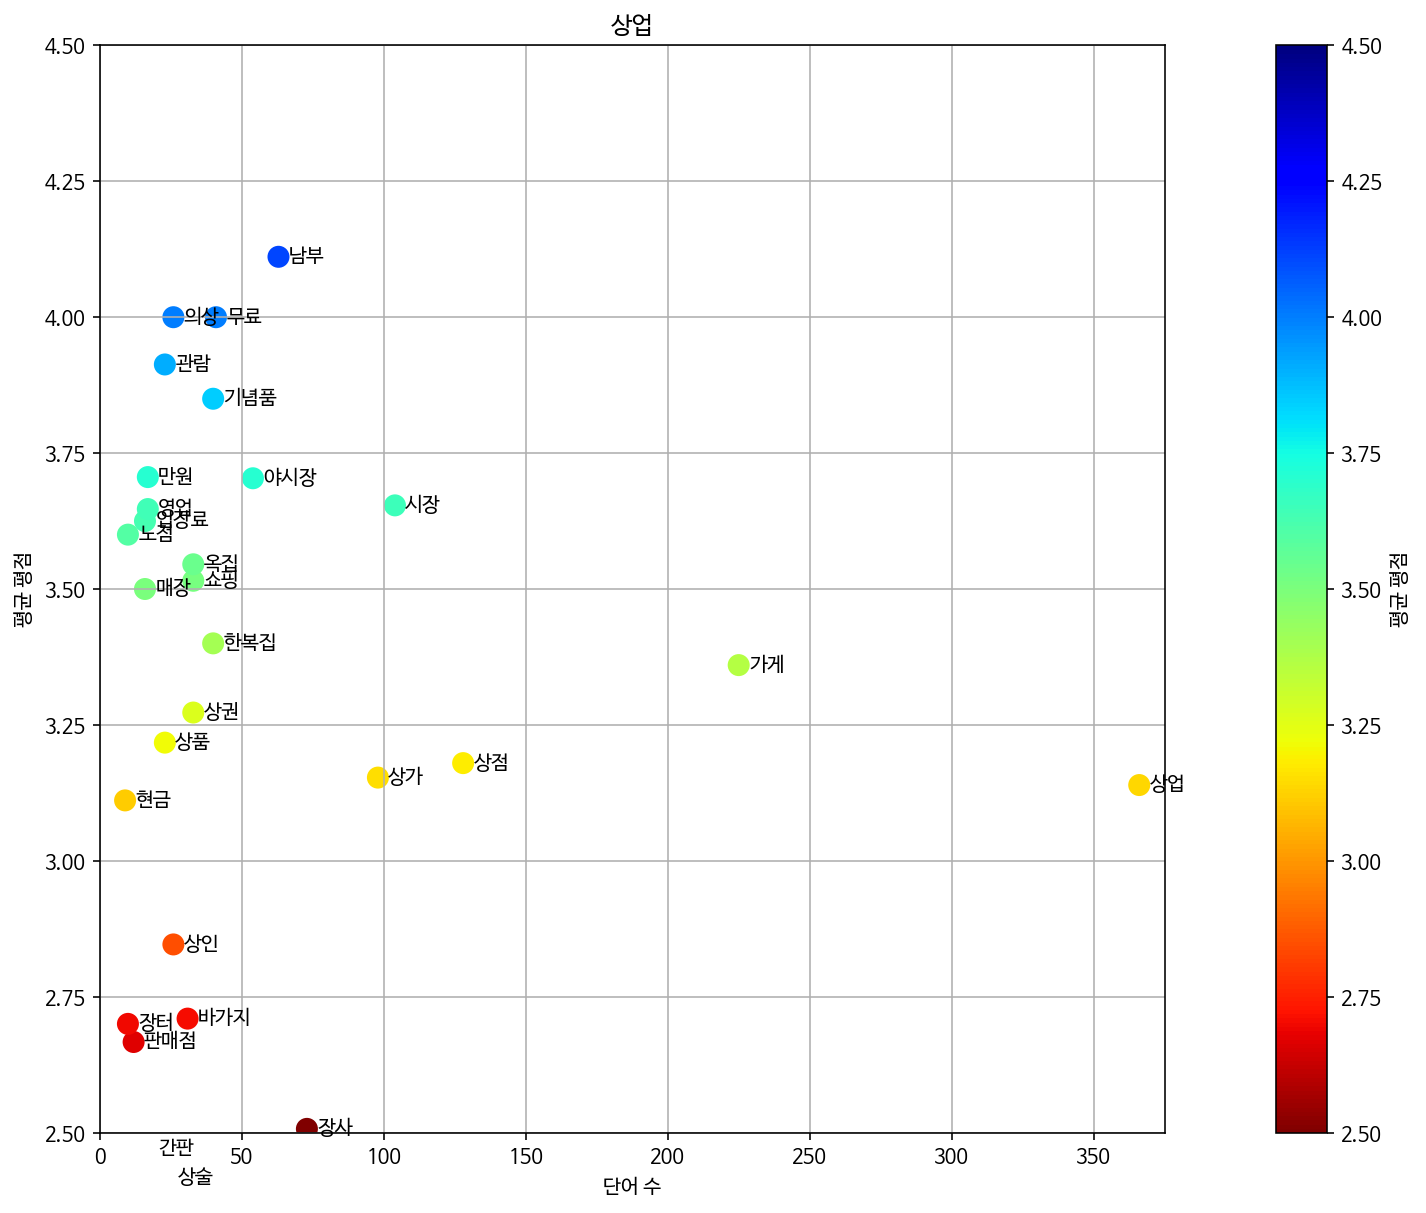

In [359]:
scatter_graph(df, goods, ['한복'], title='상업')

##### 숙박

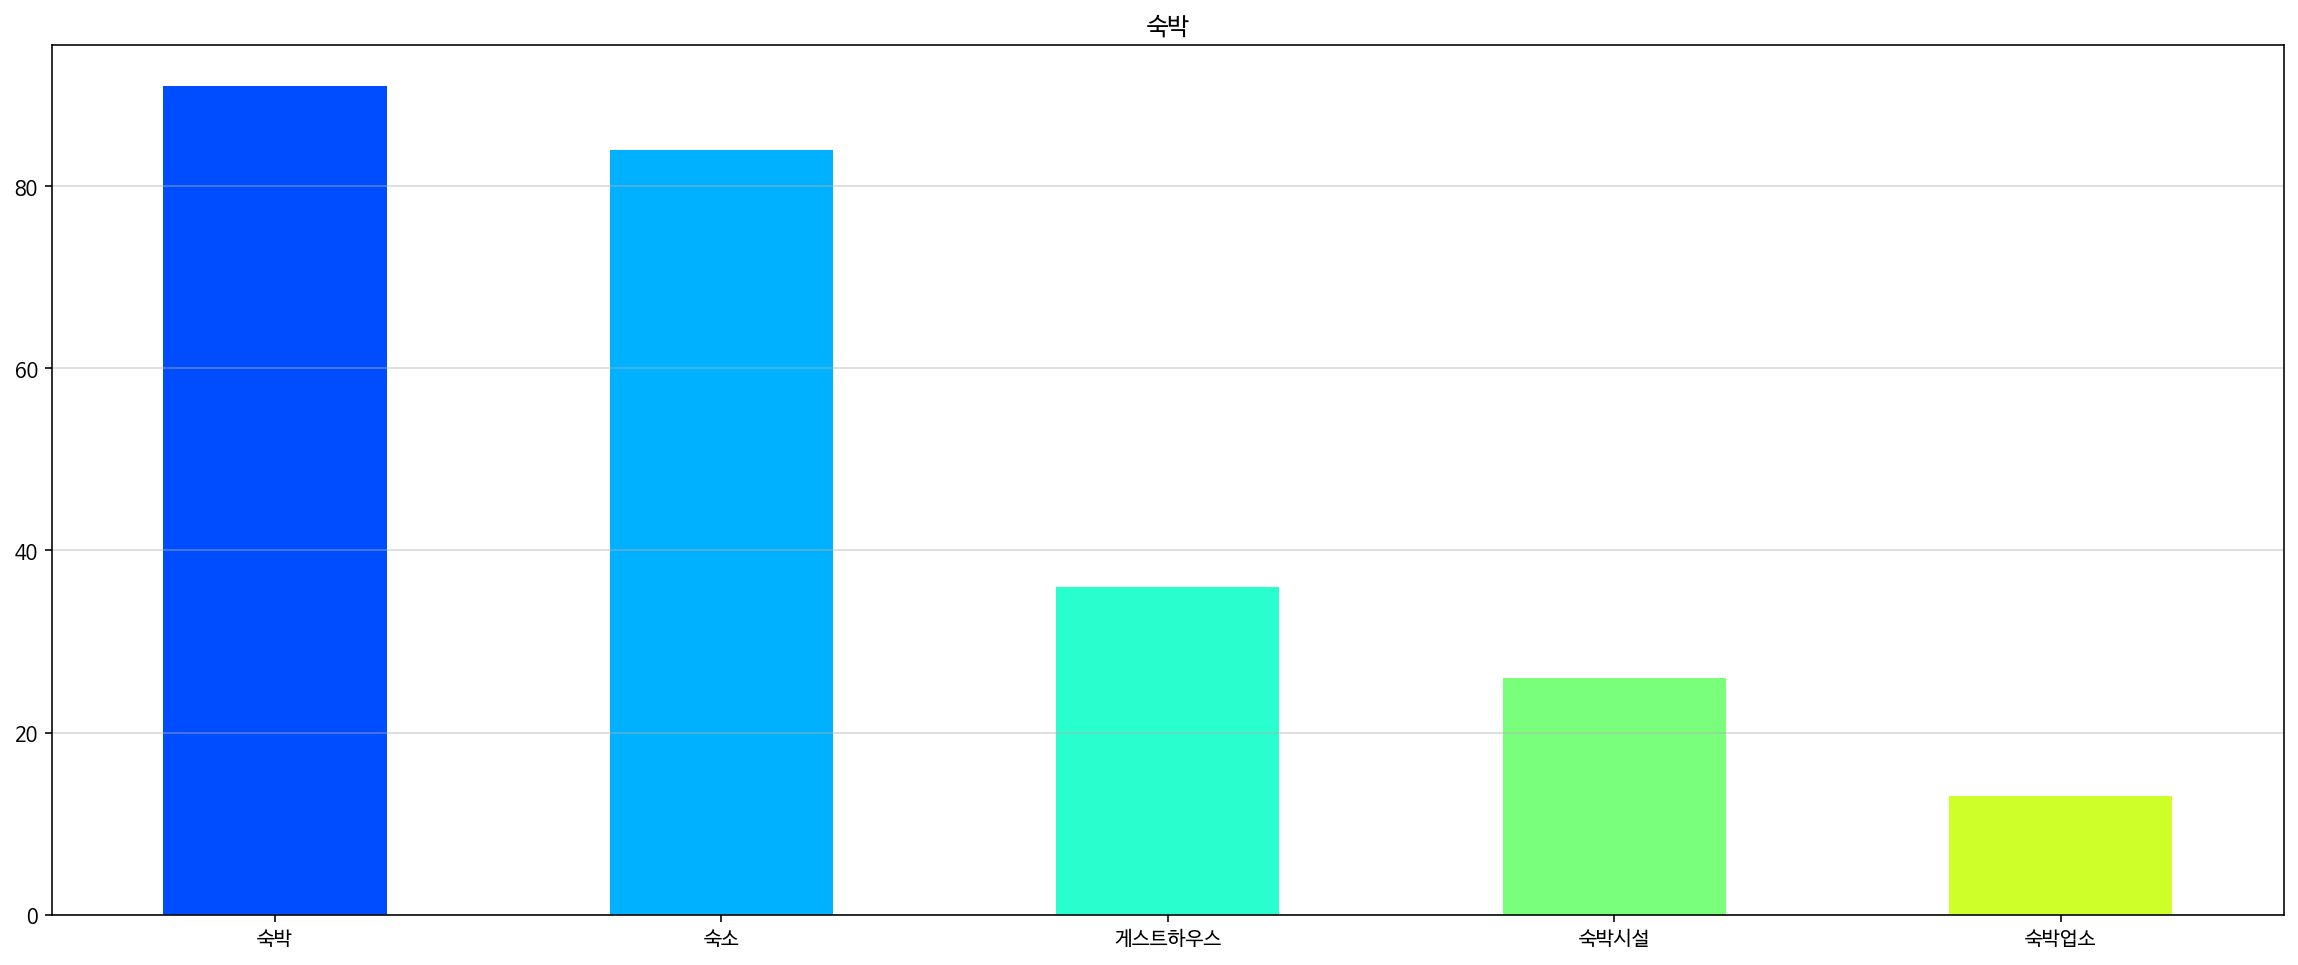

In [407]:
bar_graph(df, sleep, title='숙박')

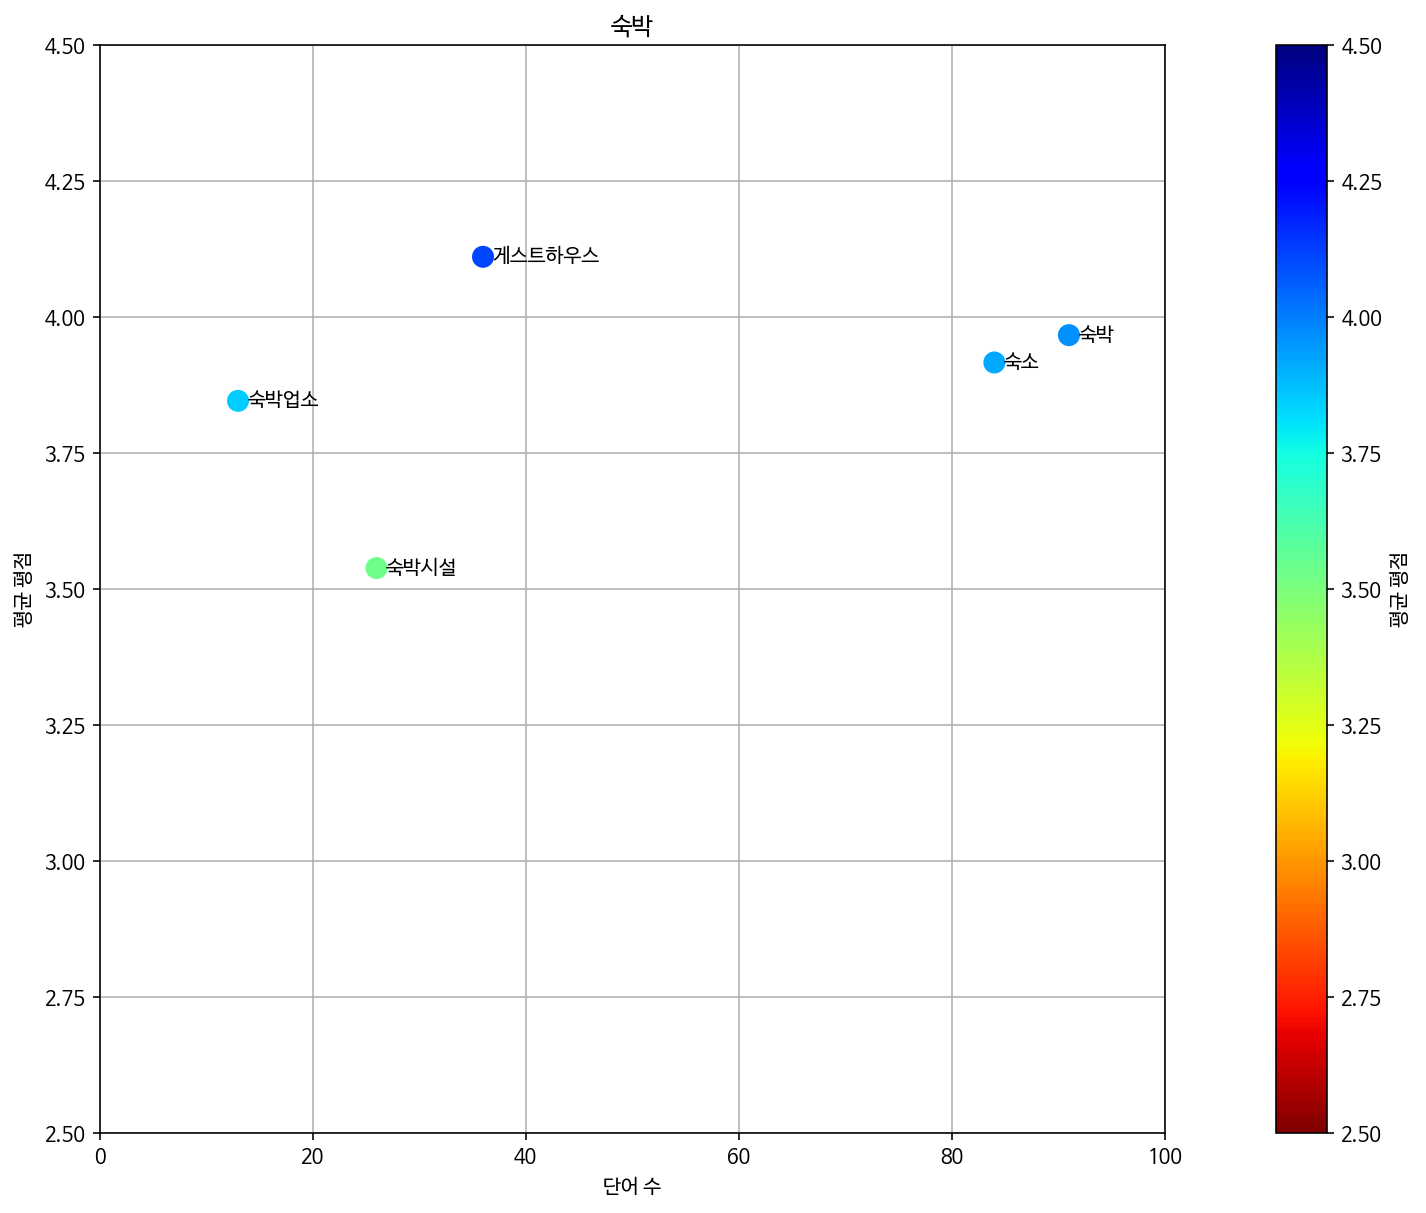

In [360]:
scatter_graph(df, sleep, title='숙박')

##### 사이트 공식 체험

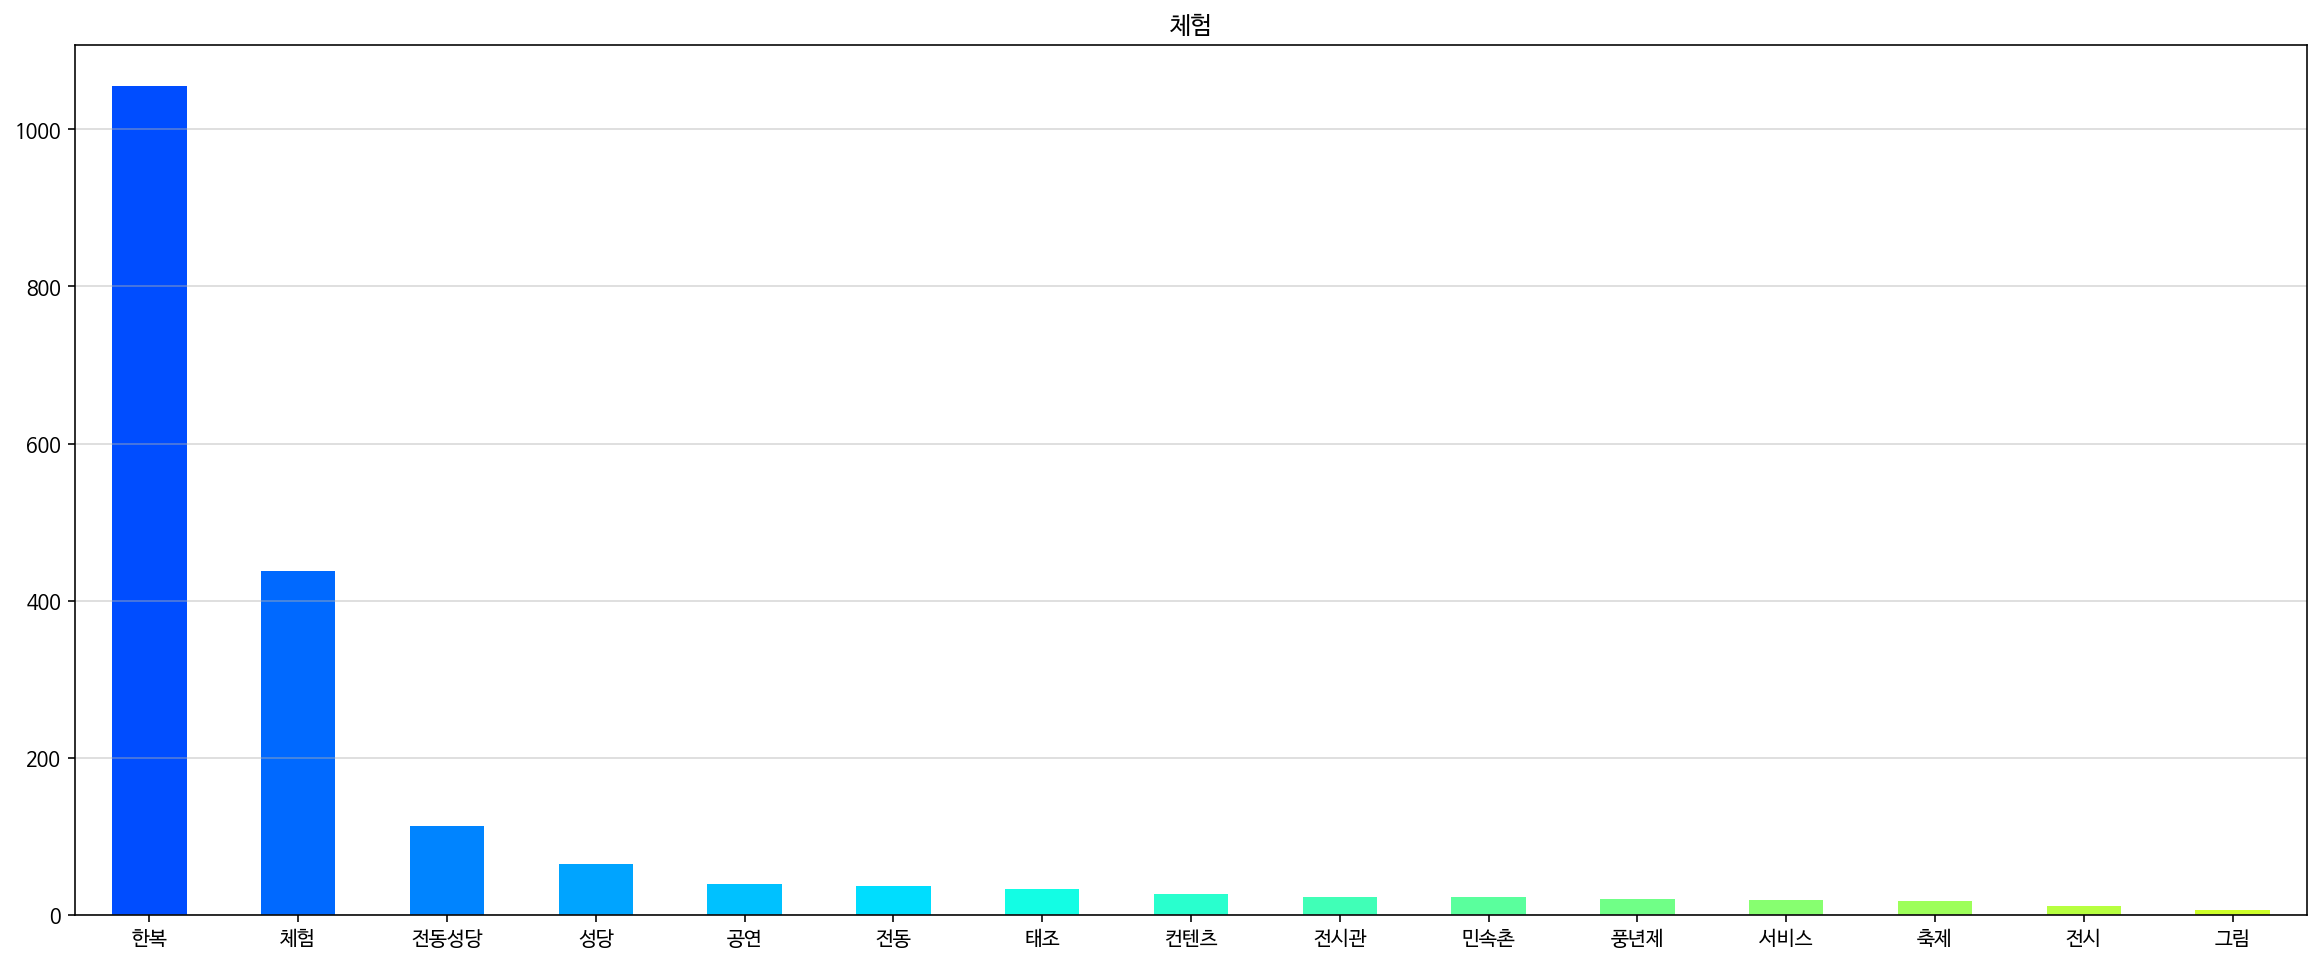

In [412]:
bar_graph(df, enjoy, title='체험')

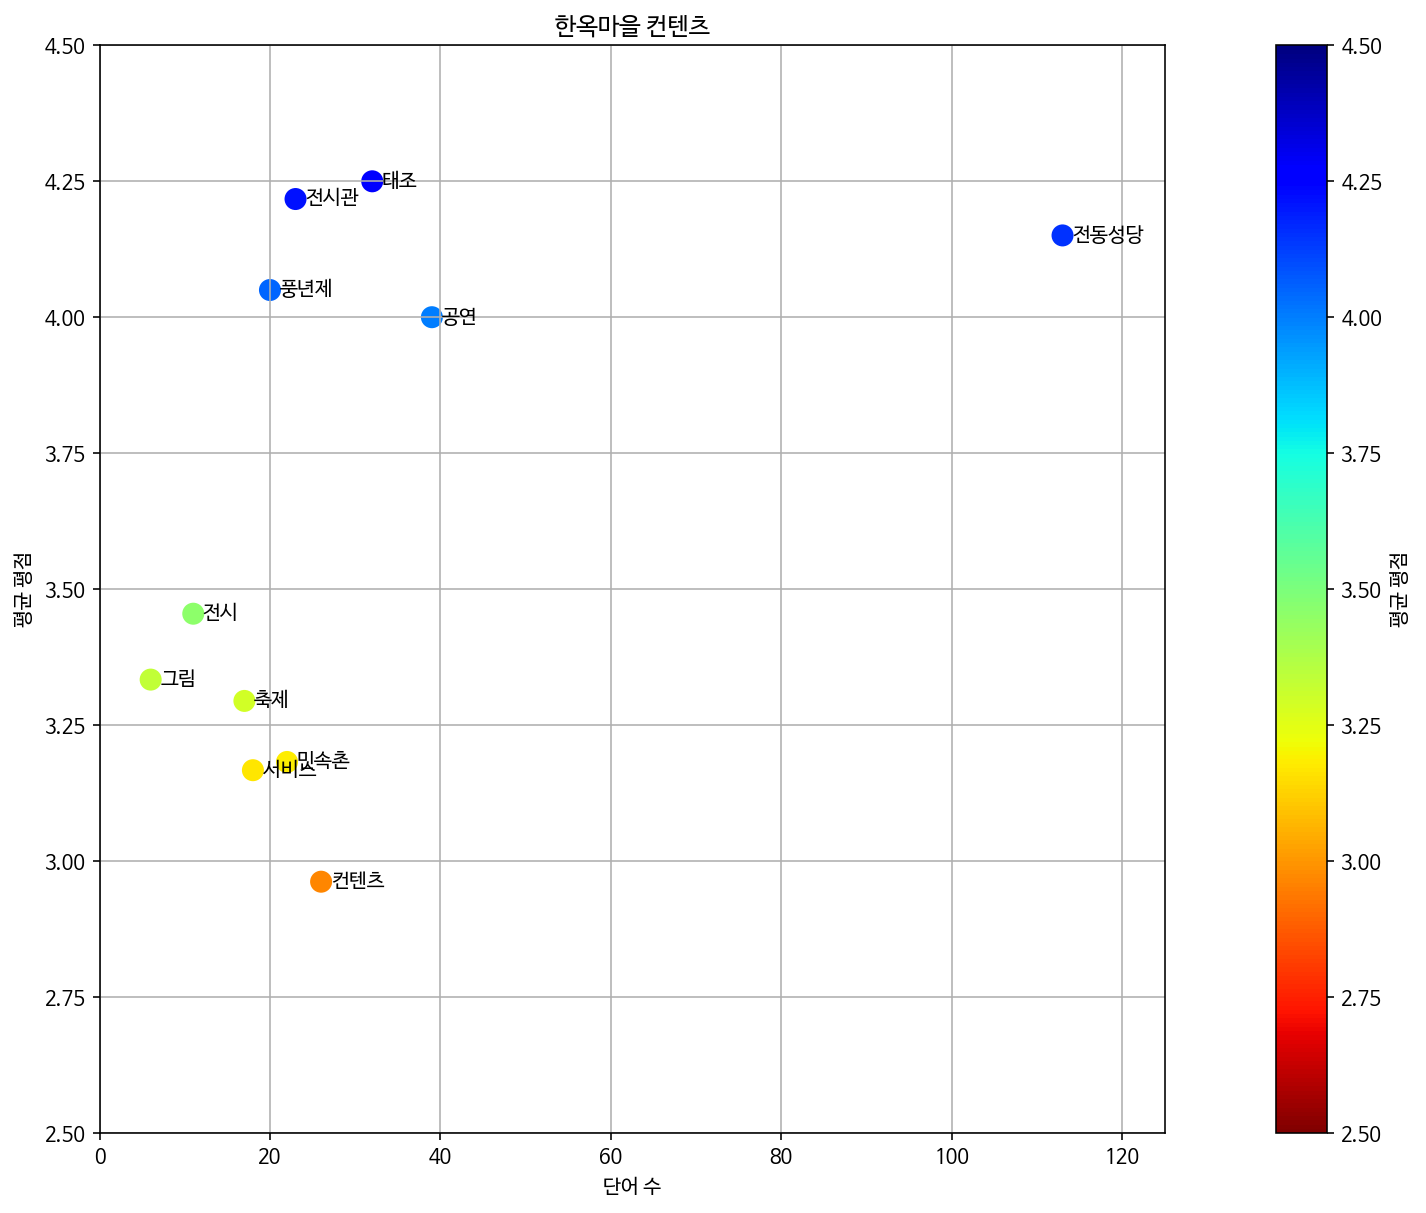

In [361]:
scatter_graph(df, enjoy, ['한복', '체험', '전동', '성당'], title='한옥마을 컨텐츠')

##### 교통

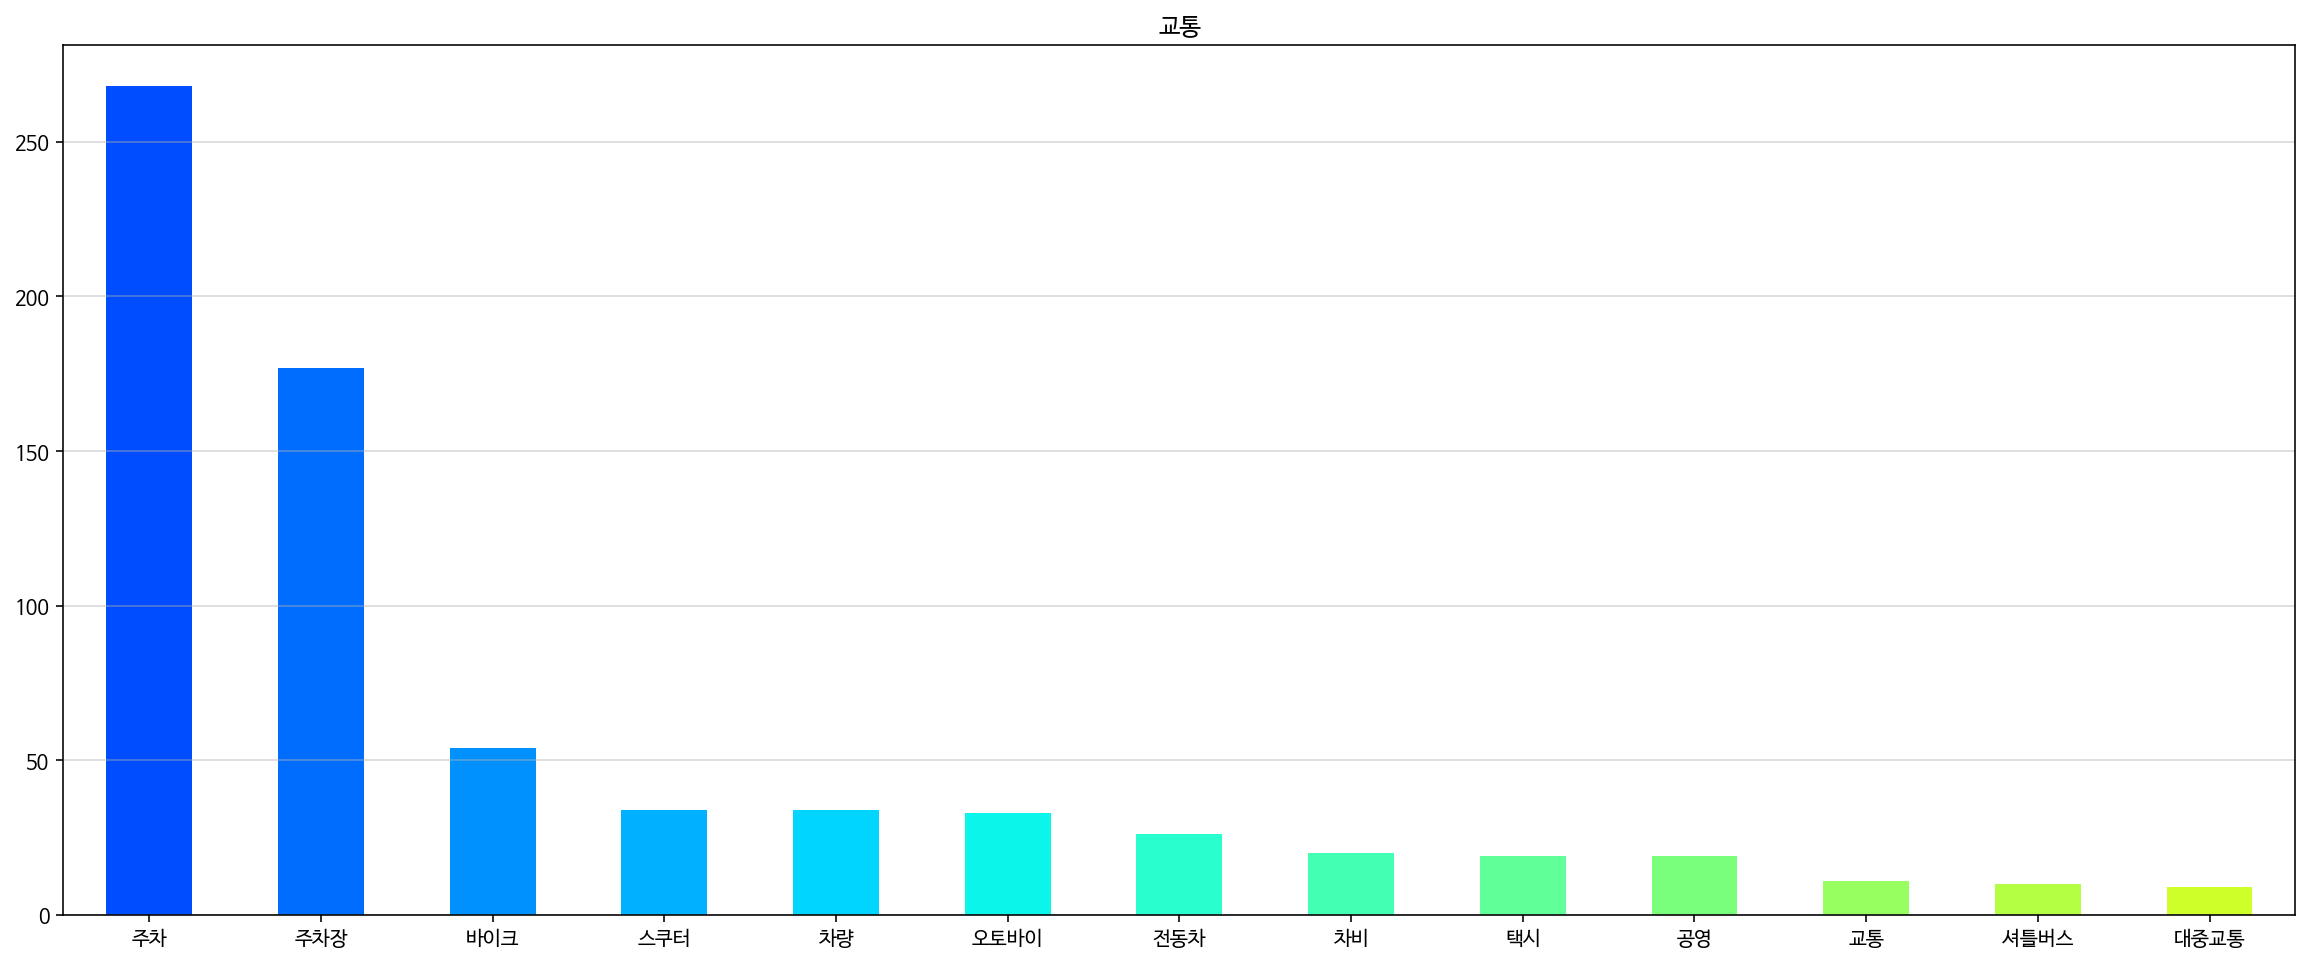

In [413]:
bar_graph(df, transport, title='교통')

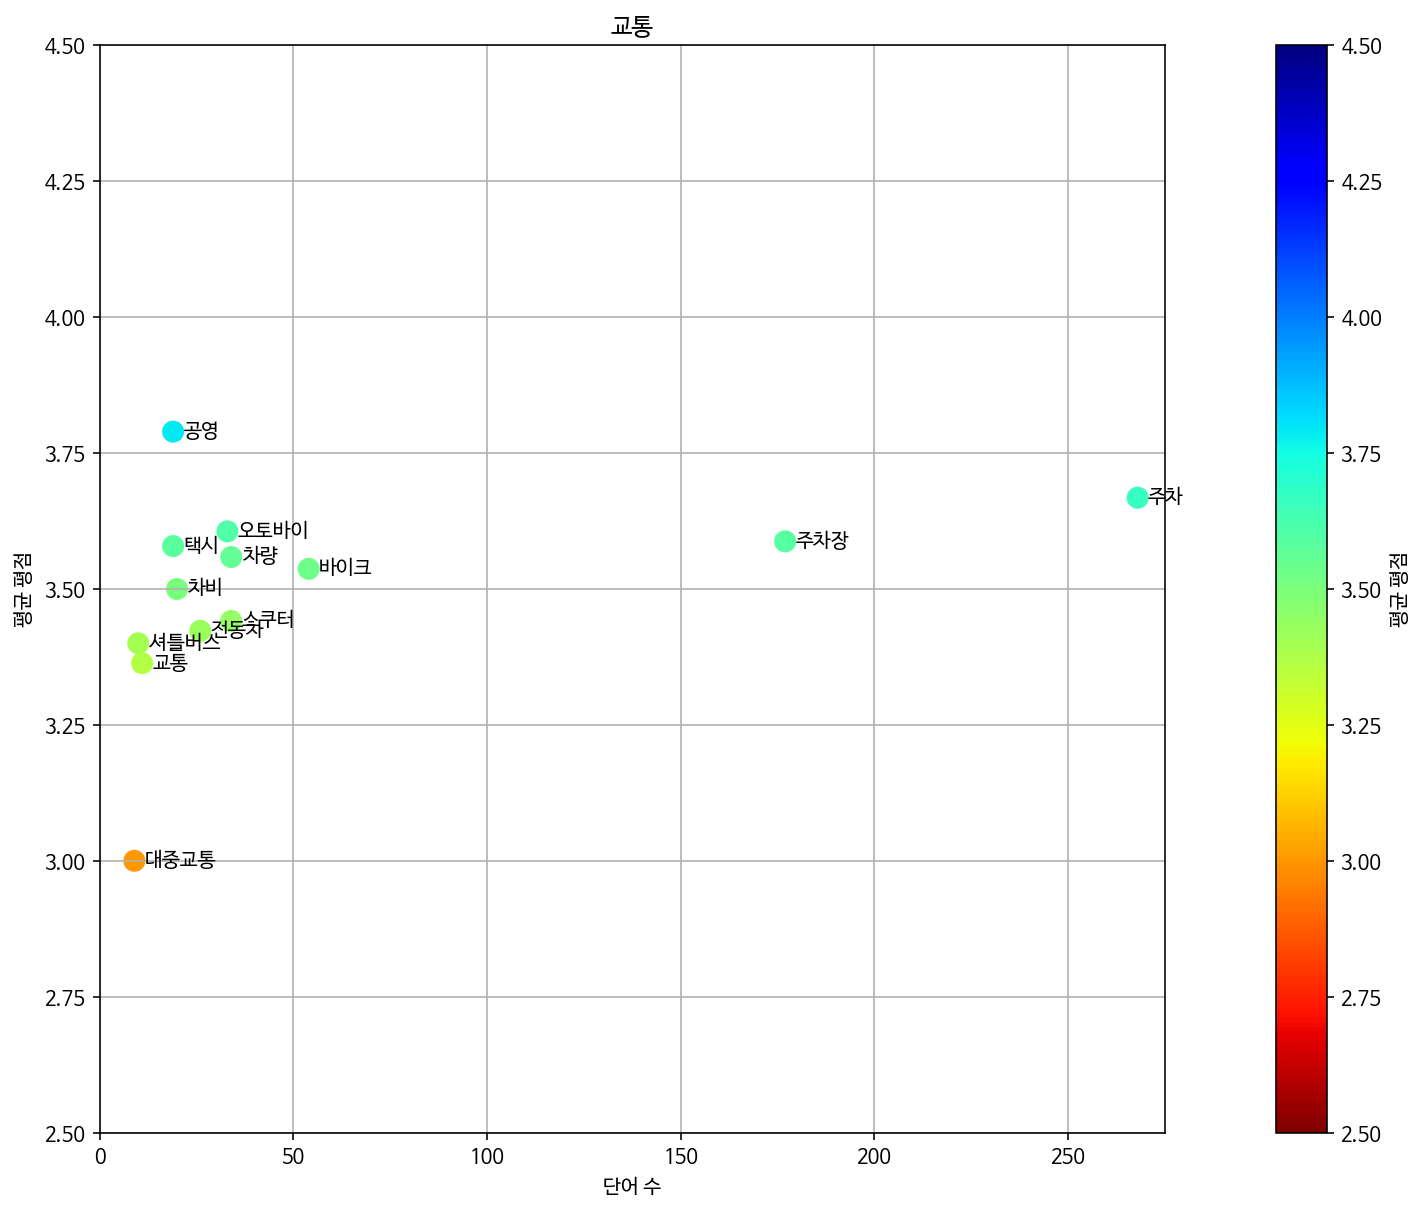

In [362]:
scatter_graph(df, transport, title='교통')
# 평균으로 모두 몰려있다.

##### 사람 관련

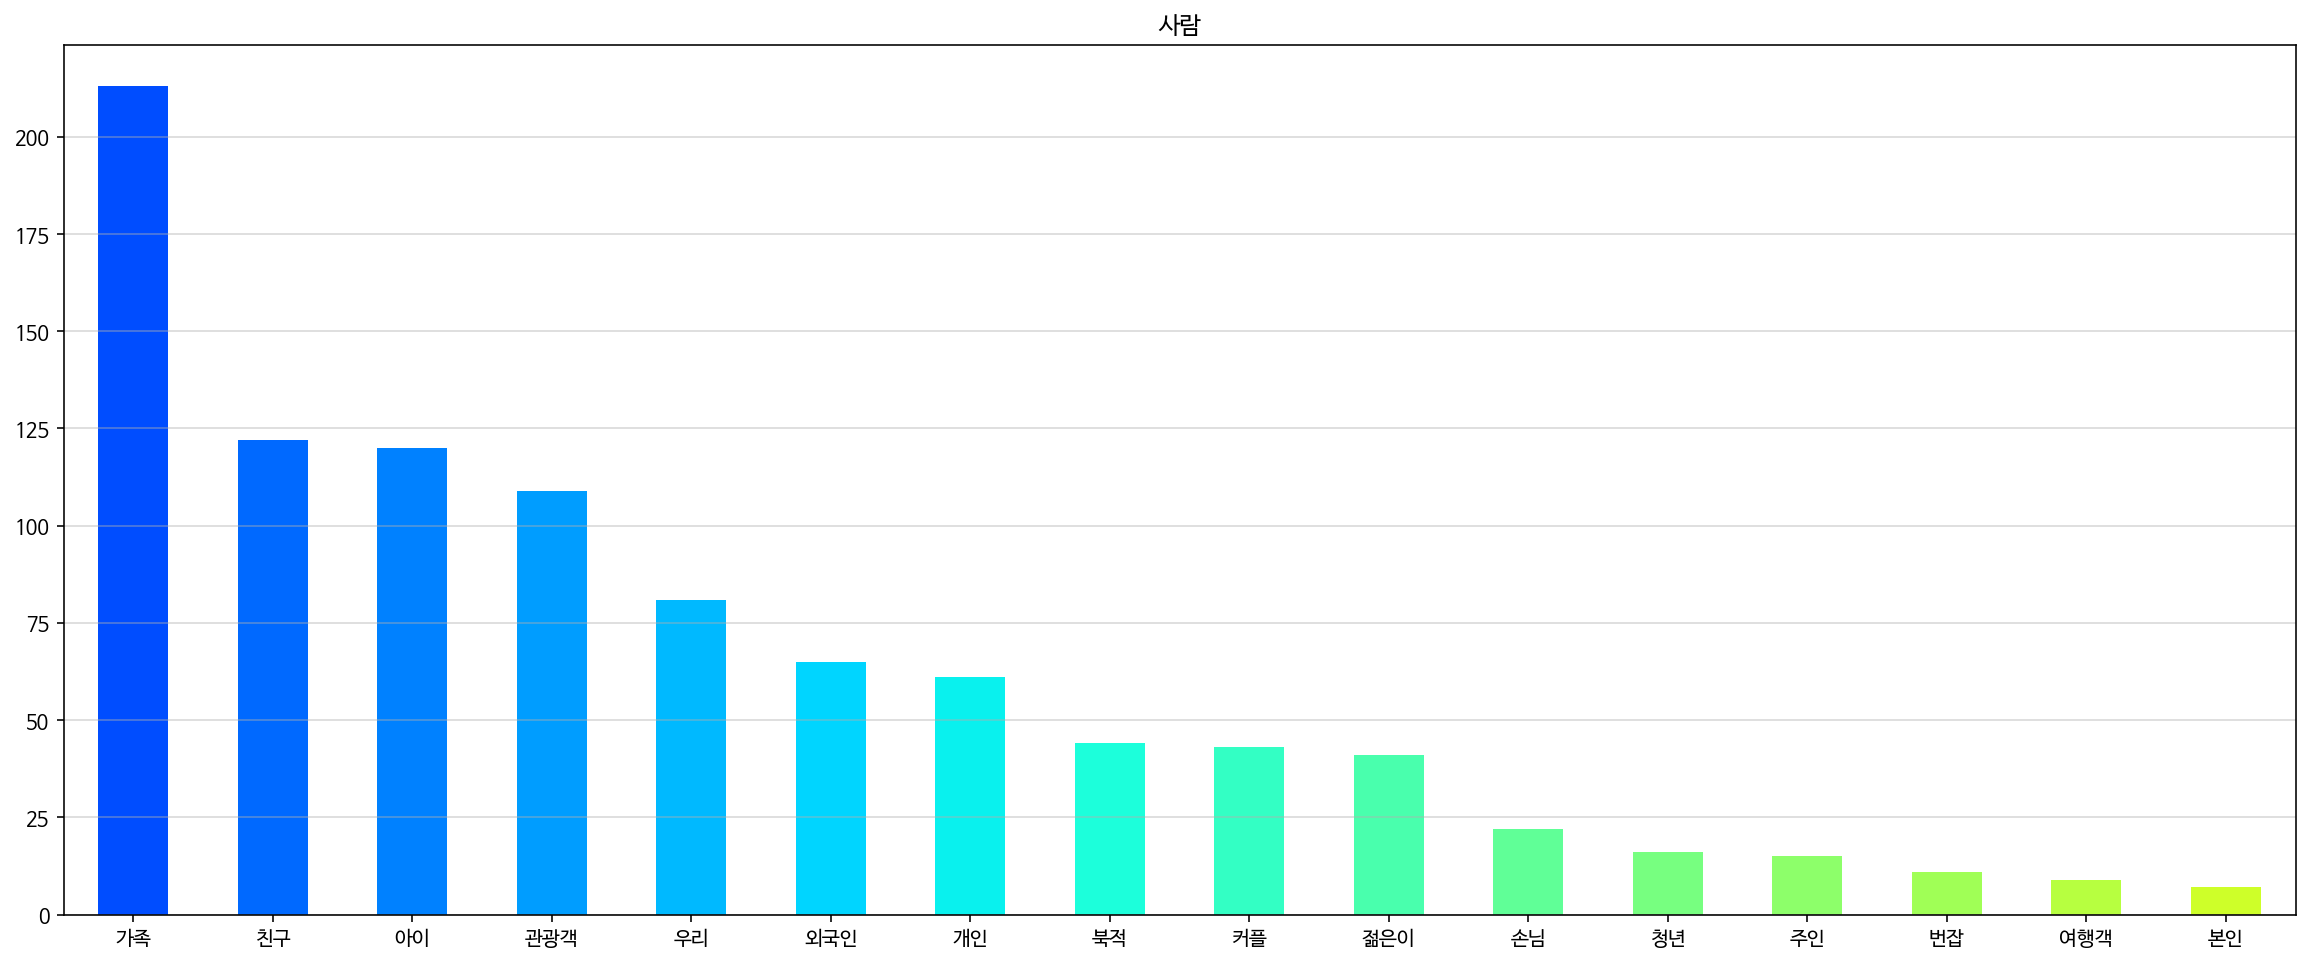

In [414]:
bar_graph(df, human, ['사람'], title='사람')

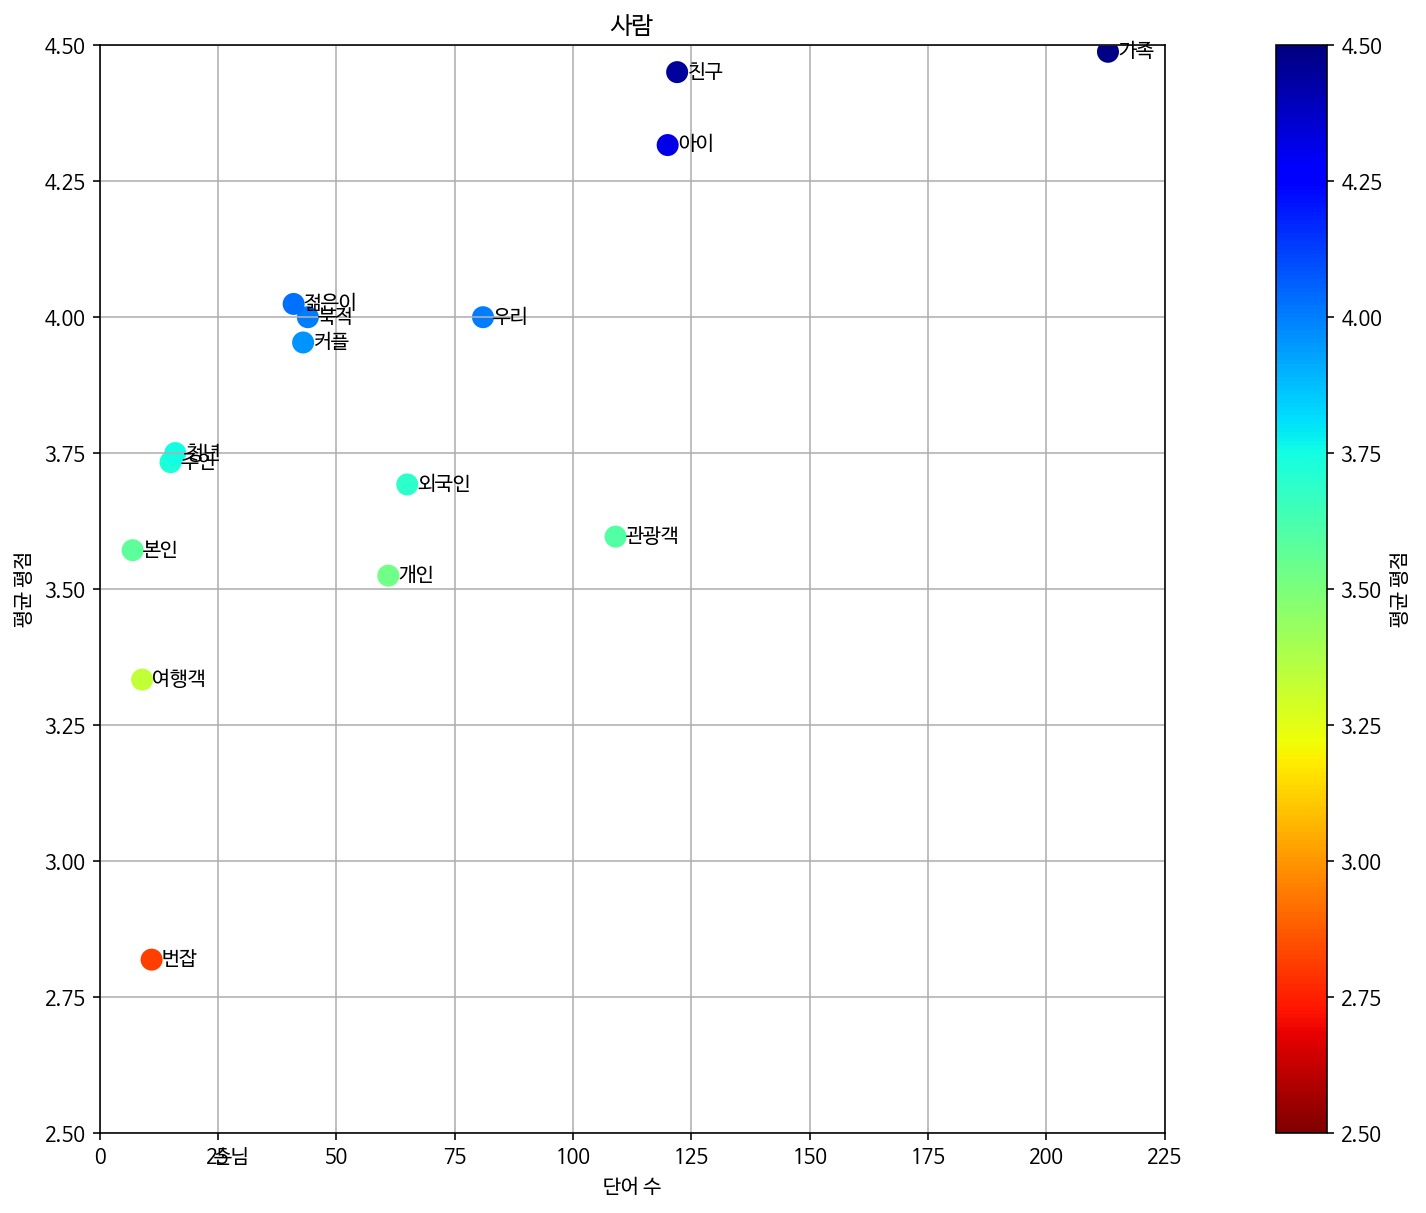

In [364]:
scatter_graph(df, human, ['사람'], '사람')

##### 환경

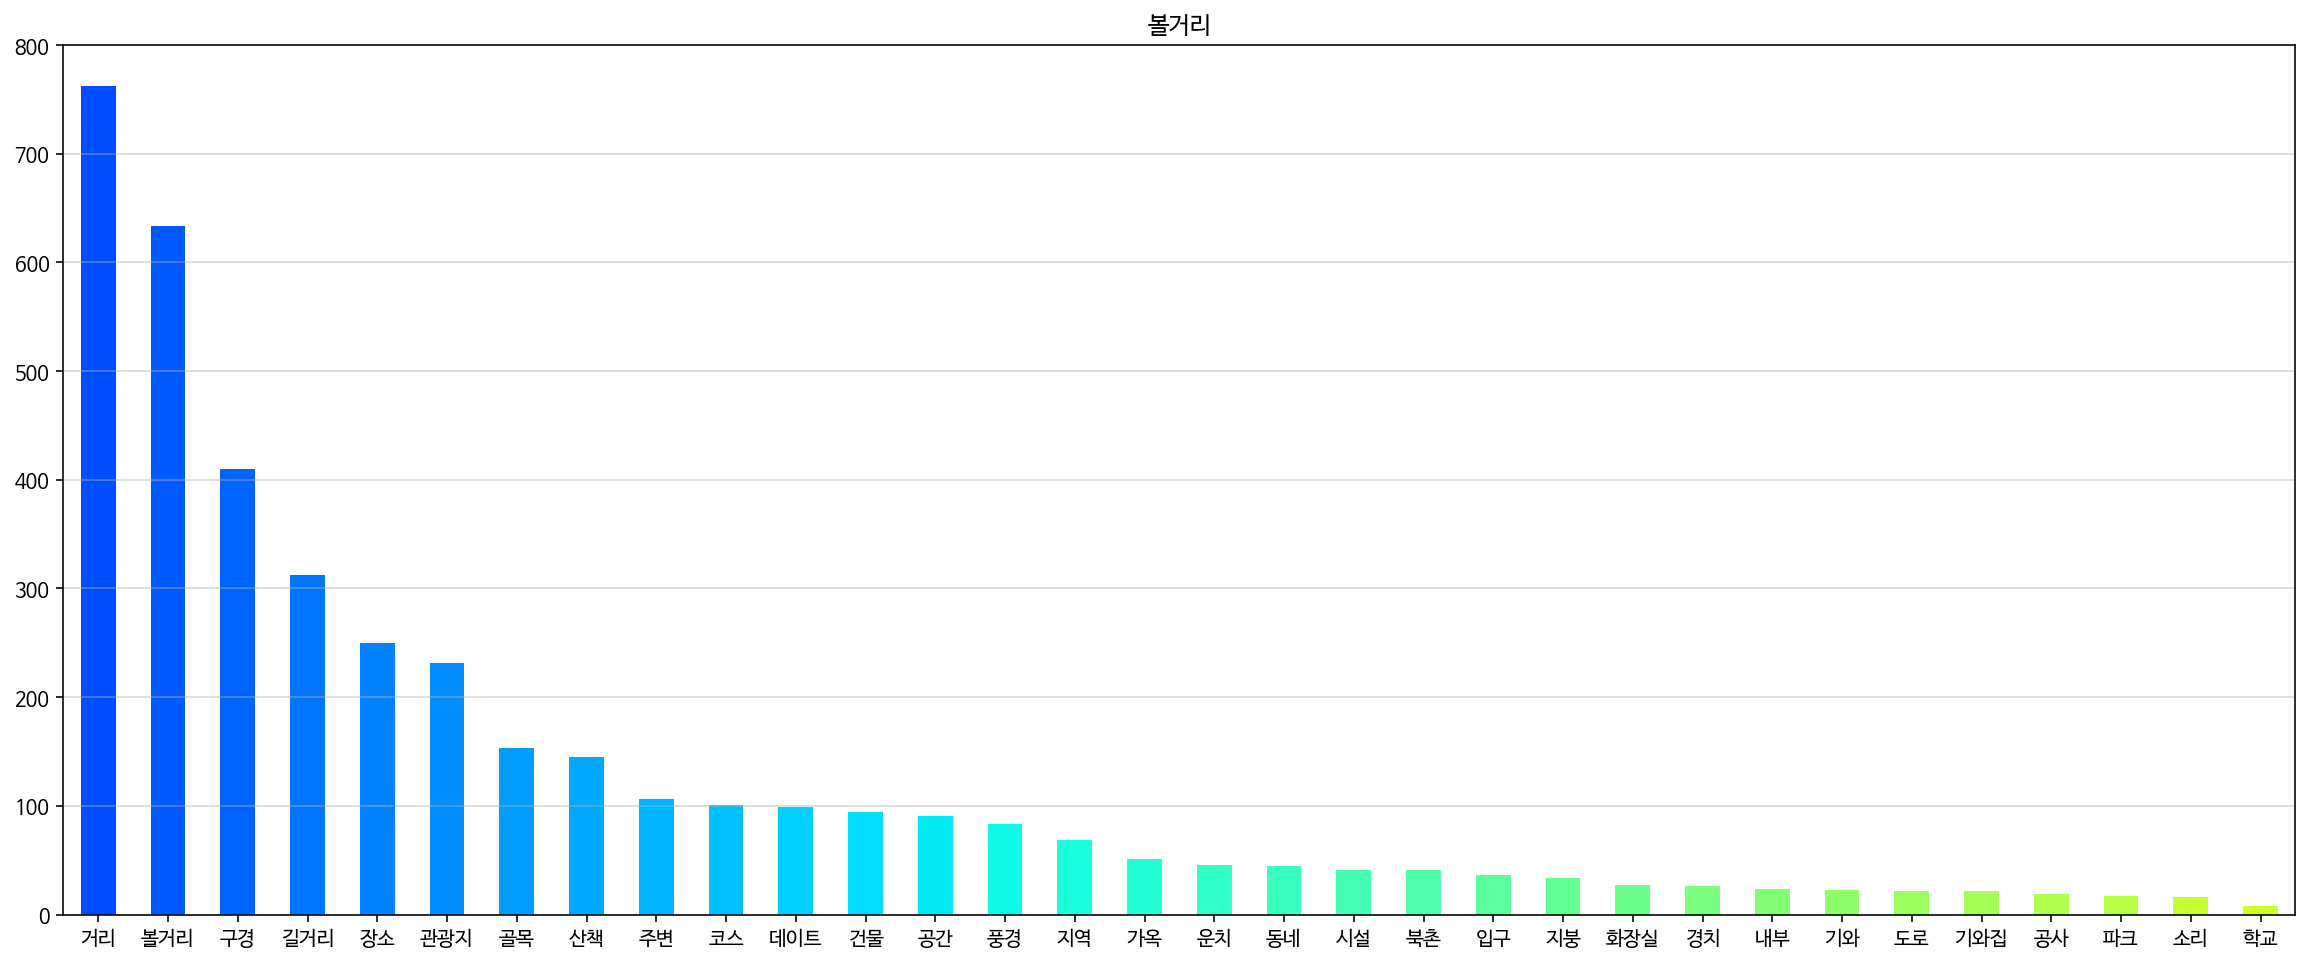

In [415]:
bar_graph(df, env, title='볼거리')

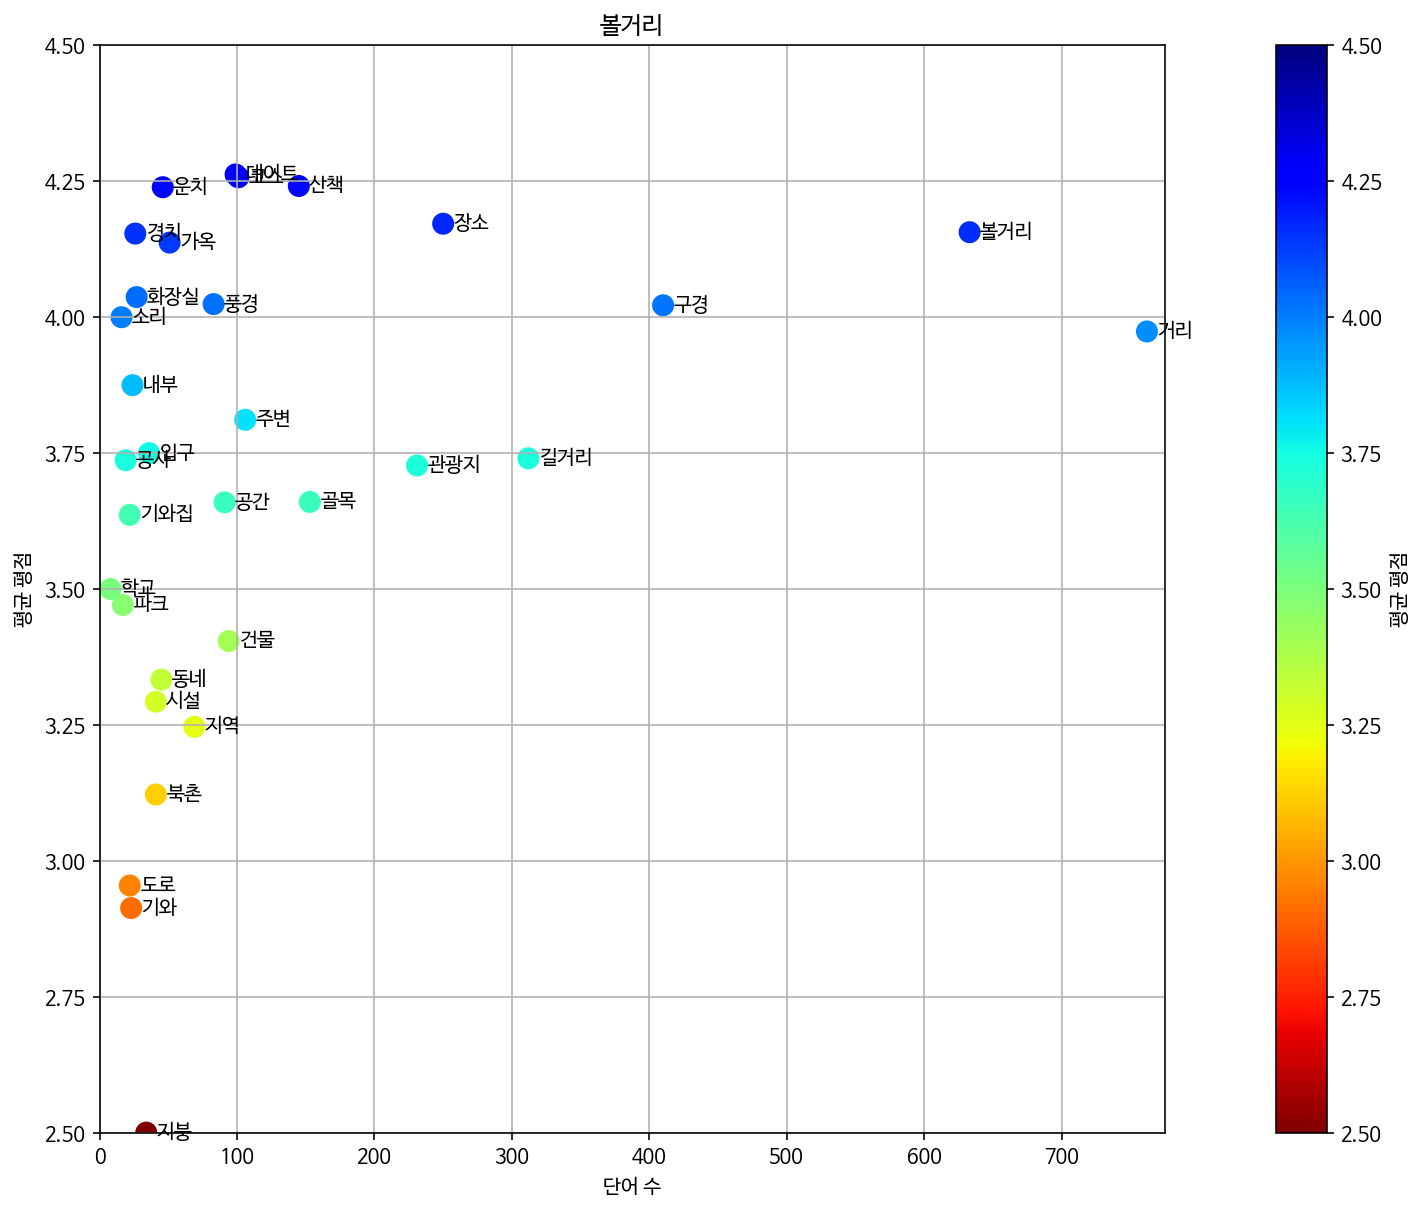

In [363]:
scatter_graph(df, env, title='볼거리')

In [ ]:
# 리뷰에선 별로 안나왔지만, 화장실 이슈는 기사에서 많이 나왔다. 왜지

In [ ]:
# 뭘 얻으려는지 / 왜 선택했는지

In [ ]:
# 카테고리별로 나눴을 때, 가장 높은 평균과 가장 낮은 평균 별점을 가진 두 개를
# 같은 그래프 상에 나타내어서, 색 대비를 주는게 어떨까
# 음식은 빨강, 컨텐츠는 파랑 같은걸로

# 여러 분포를 비교할 순 없나